In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### In this example, we will write the output of Sycamore job from a pdf in s3 bucket to a target location and extract images, and summarize them using gpt-4-turbo. 

##### The Aryn Partitioner in this job is configured to use the Aryn Partitioning Service to provide fast, GPU-powered performance. Go to [aryn.ai/sign-up ](aryn.ai/sign-up) to get a free API key for the service. This is the recommended configuration.

##### You can also run the Aryn Partitioner locally by setting `use_partitioning_service` to `False`. Though you can use CPU to run the Aryn Partitioner, it is recommended to use an NVIDIA GPU for good performance.

In [6]:
from sycamore.utils.aryn_config import ArynConfig, DEFAULT_PATH
assert ArynConfig.get_aryn_api_key() != "", f"Unable to find aryn API key.  Looked in {DEFAULT_PATH}"

if the above assertion fails, you can either set the environment variable ARYN_API_KEY and restart jupyter
or make a yaml file at the specified path in the assertion error that looks like:

```
aryn_token: "YOUR-ARYN-API-KEY"
```

It is unsafe, but if neither of those options work, you can put it in this notebook with
```
import os
os.environ["ARYN_API_KEY"] = "UNSAFE-ARYN-API-KEY-LOCATION" 
```

but beware that it is easy to accidentally commit the notebook file and have it include your key.

In [7]:
doc_path = "../lib/sycamore/sycamore/tests/resources/data/pdfs/Transformer.pdf"

# For debug checking; be careful this will put your key in the jupyter notebook
#print(ArynConfig.get_aryn_api_key())

In [8]:
# This example calls the parititoner directly and prints the output
import logging
import os

from sycamore.utils.aryn_config import ArynConfig
from sycamore.transforms.detr_partitioner import ArynPDFPartitioner

logging.getLogger().setLevel(logging.INFO)

a = ArynPDFPartitioner(model_name_or_path=None)
with open(doc_path, "rb") as file:
    b = a.partition_pdf(file, aryn_api_key=ArynConfig.get_aryn_api_key())
    print(b)

INFO:sycamore.transforms.detr_partitioner:ArynPartitioner: T+   0.00: Server version 0.2024.06.28
INFO:sycamore.transforms.detr_partitioner:ArynPartitioner: T+   0.00: Received request with aryn_call_id=8e05d0f2-9879-41c0-83e9-261616ab5ba1
INFO:sycamore.transforms.detr_partitioner:ArynPartitioner: T+   0.00: Waiting for scheduling
INFO:sycamore.transforms.detr_partitioner:ArynPartitioner: T+   0.00: Preprocessing document
INFO:sycamore.transforms.detr_partitioner:ArynPartitioner: T+   0.04: Done preprocessing document
INFO:sycamore.transforms.detr_partitioner:ArynPartitioner: T+   0.27: completed page 1
INFO:sycamore.transforms.detr_partitioner:ArynPartitioner: T+   0.40: completed page 2
INFO:sycamore.transforms.detr_partitioner:ArynPartitioner: T+   0.55: completed page 3
INFO:sycamore.transforms.detr_partitioner:ArynPartitioner: T+   0.63: completed page 4
INFO:sycamore.transforms.detr_partitioner:ArynPartitioner: T+   0.64: completed page 5
INFO:sycamore.transforms.detr_partitioner

[{'type': 'Section-header', 'bbox': [0.3449456787109375, 0.12688432173295455, 0.6538701315487132, 0.14781652277166193], 'properties': {'score': 0.6711083054542542, 'page_number': 1}, 'text_representation': 'Attention Is All You Need\n'}, {'type': 'Text', 'bbox': [0.1898683256261489, 0.23573453036221592, 0.3530151726217831, 0.27458066073330967], 'properties': {'score': 0.9234482645988464, 'page_number': 1}, 'text_representation': 'Ashish Vaswani∗\nGoogle Brain\navaswani@google.com\n'}, {'type': 'Text', 'bbox': [0.37604319852941176, 0.23578136097301136, 0.5048890596277573, 0.2747060047496449], 'properties': {'score': 0.8976562023162842, 'page_number': 1}, 'text_representation': 'Noam Shazeer∗\nGoogle Brain\nnoam@google.com\n'}, {'type': 'Text', 'bbox': [0.2062130198759191, 0.2996405584161932, 0.34400702981387865, 0.3377830089222301], 'properties': {'score': 0.8438072204589844, 'page_number': 1}, 'text_representation': 'Llion Jones∗\nGoogle Research\nllion@google.com\n'}, {'type': 'Text',

2024-07-31 17:25:09,959	INFO worker.py:1740 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8268 
(pid=25881) INFO:root:Spurious log 1: Verifying that log messages are propogated
2024-07-31 17:25:16,994	WARNING util.py:560 -- The argument ``compute`` is deprecated in Ray 2.9. Please specify argument ``concurrency`` instead. For more information, see https://docs.ray.io/en/master/data/transforming-data.html#stateful-transforms.
2024-07-31 17:25:17,001	INFO streaming_executor.py:112 -- Starting execution of Dataset. Full logs are in /tmp/ray/session_2024-07-31_17-25-08_162223_21157/logs/ray-data
2024-07-31 17:25:17,001	INFO streaming_executor.py:113 -- Execution plan of Dataset: InputDataBuffer[Input] -> TaskPoolMapOperator[ReadBinary] -> ActorPoolMapOperator[Map(BinaryScan._to_document)->MapBatches(BaseMapTransformCallable___wrap)] -> TaskPoolMapOperator[MapBatches(split_and_convert_to_image)] -> LimitOperator[limit=2] -> TaskPoolMapOperator[MapBatches(DrawBoxes)]


- ReadBinary->SplitBlocks(8) 1:   0%|                                                                         …

- Map(BinaryScan._to_document)->MapBatches(BaseMapTransformCallable___wrap) 2:   0%|                          …

- MapBatches(split_and_convert_to_image) 3:   0%|                                                             …

- limit=2 4:   0%|                                                                                            …

- MapBatches(DrawBoxes) 5:   0%|                                                                              …

Running 0:   0%|                                                                                              …

(pid=26144) INFO:root:Spurious log 1: Verifying that log messages are propogated [repeated 2x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(MapWorker(Map(BinaryScan._to_document)->MapBatches(BaseMapTransformCallable___wrap)) pid=26144) INFO:sycamore.utils.time_trace:loading_model wall:  3.806 user:  1.313sys:  0.115 rss_mib: 653.992
(MapWorker(Map(BinaryScan._to_document)->MapBatches(BaseMapTransformCallable___wrap)) pid=26144) INFO:sycamore.utils.time_trace:load_model_start wall:  3.806 user:  1.313sys:  0.115 rss_mib: 653.992
(MapWorker(Map(BinaryScan._to_document)->MapBatches(BaseMapTransformCallable___wrap)) pid=26144) The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
(MapWorker(Map(BinaryScan._to_document)->MapBatches(BaseMapTransfo

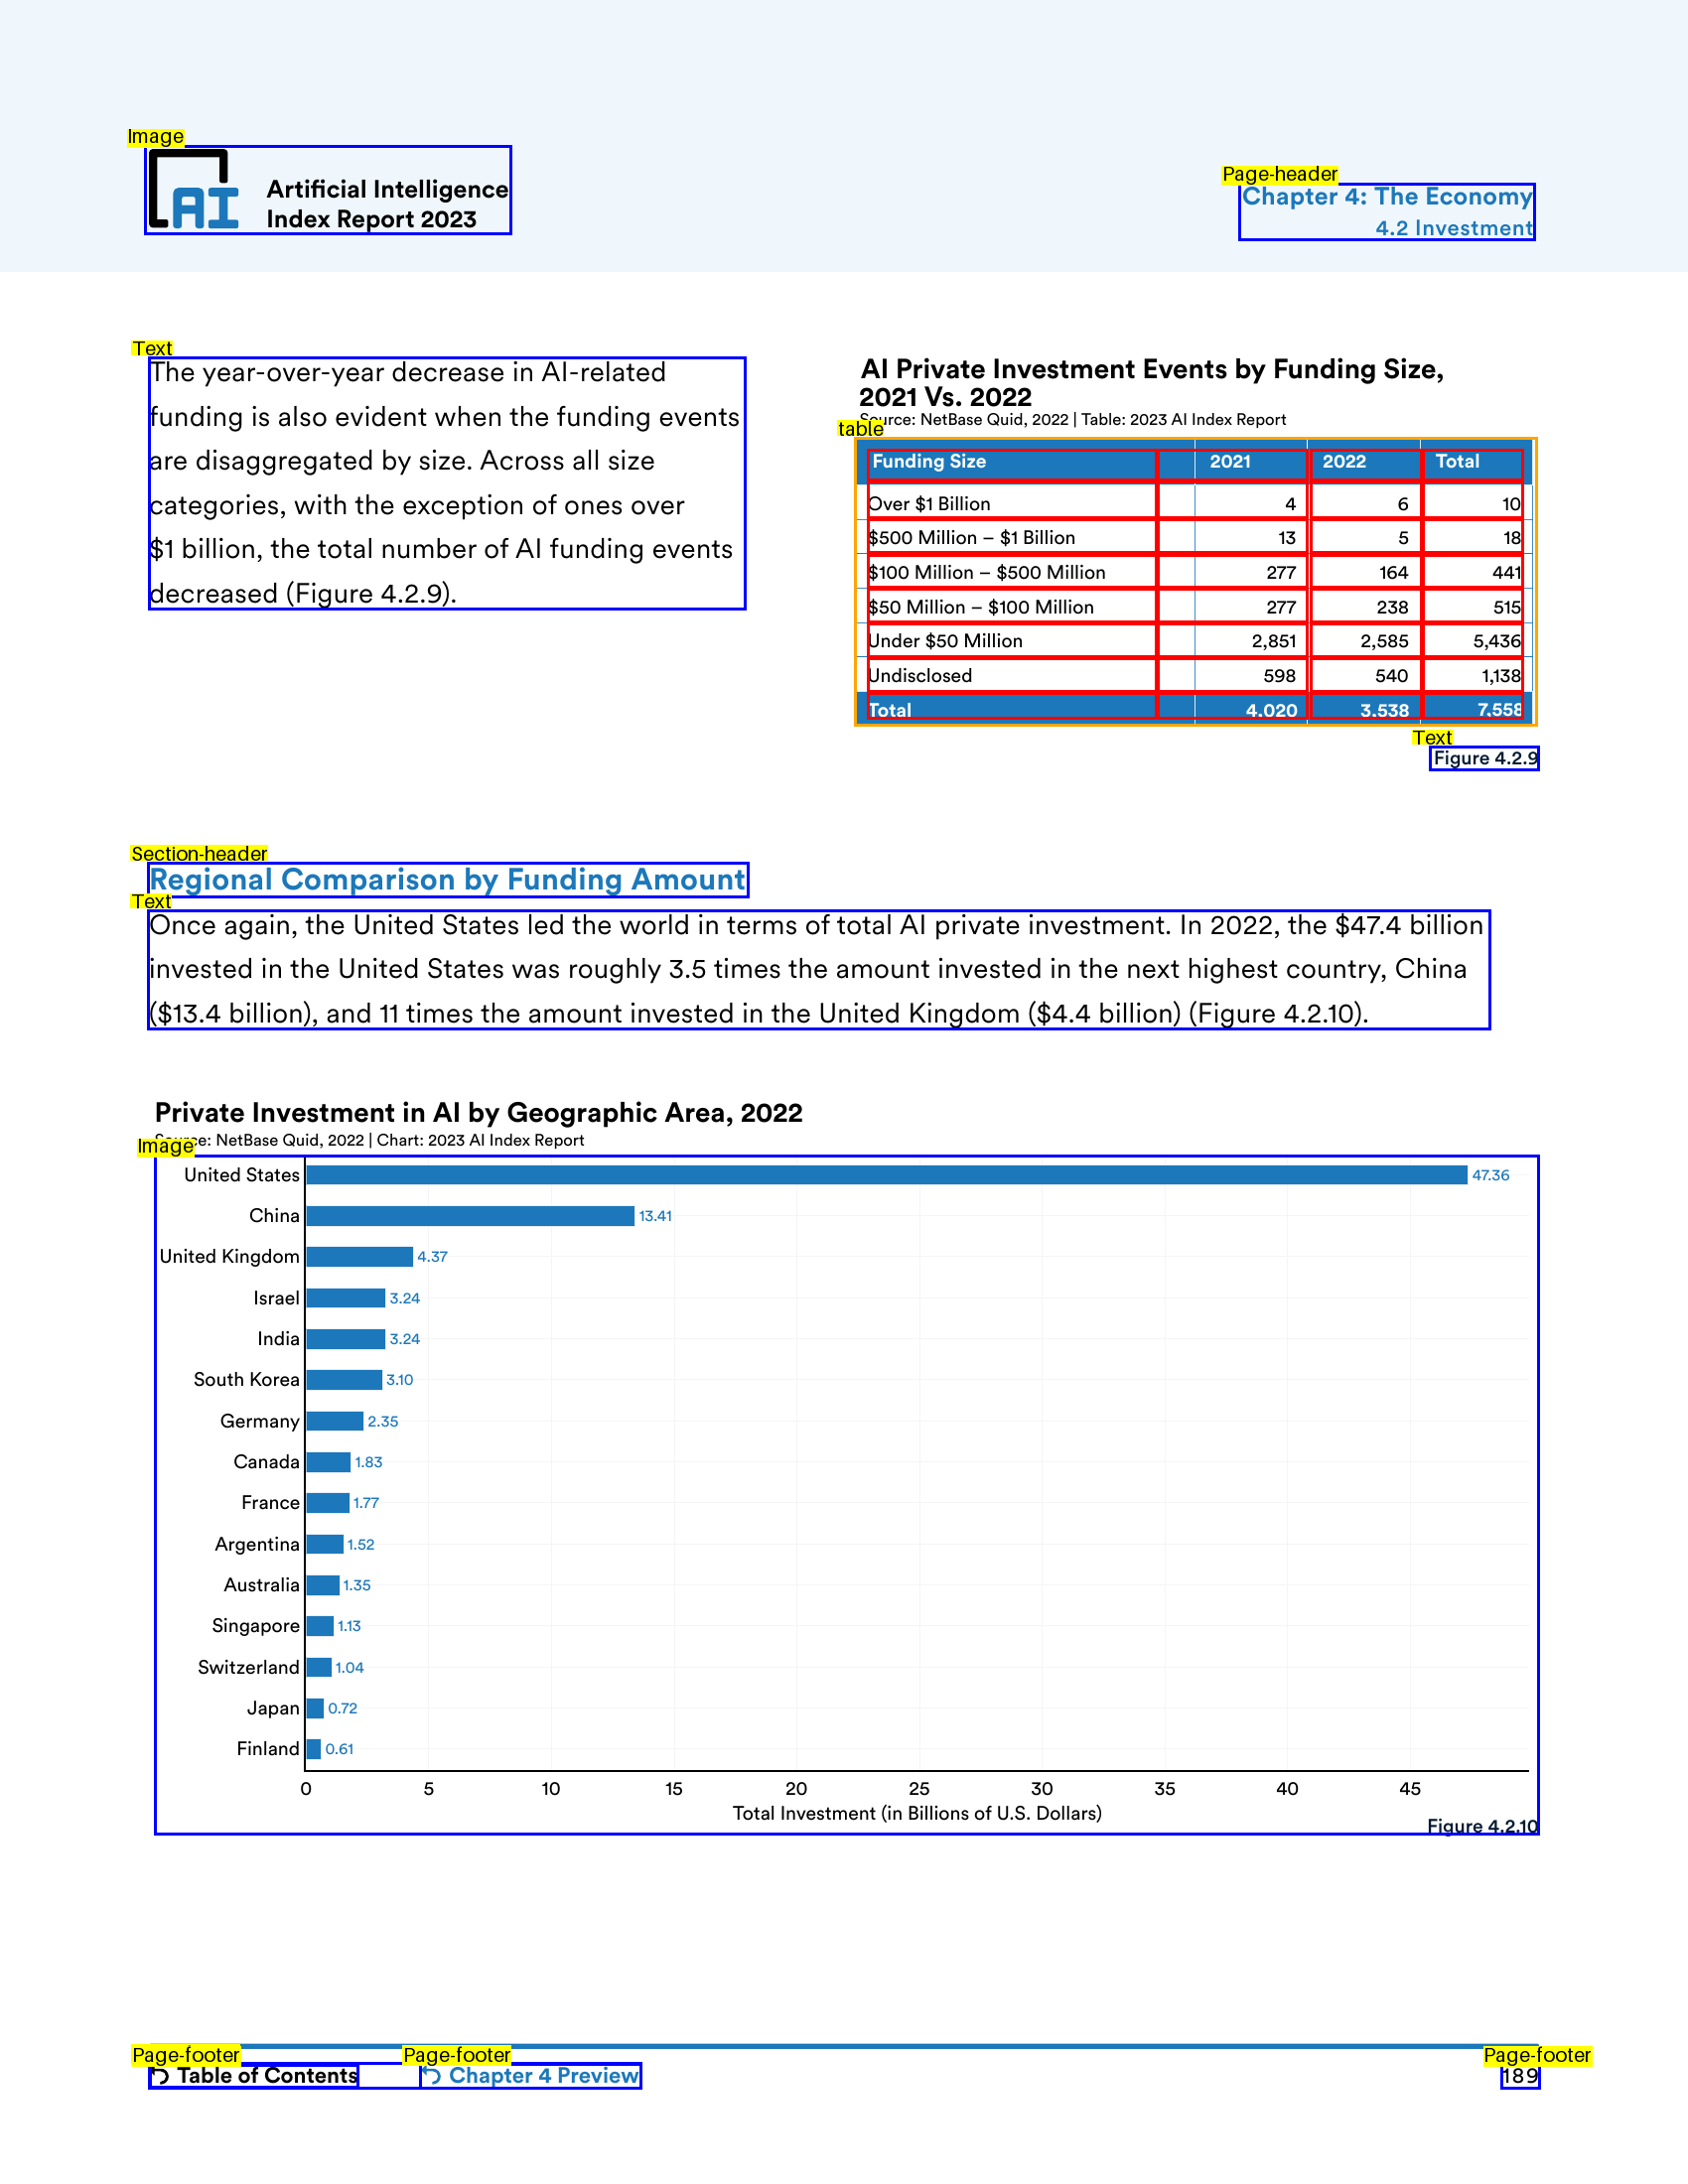

2024-07-31 17:25:24,394	WARNING util.py:560 -- The argument ``compute`` is deprecated in Ray 2.9. Please specify argument ``concurrency`` instead. For more information, see https://docs.ray.io/en/master/data/transforming-data.html#stateful-transforms.
2024-07-31 17:25:24,397	WARNING util.py:560 -- The argument ``compute`` is deprecated in Ray 2.9. Please specify argument ``concurrency`` instead. For more information, see https://docs.ray.io/en/master/data/transforming-data.html#stateful-transforms.
2024-07-31 17:25:24,404	INFO streaming_executor.py:112 -- Starting execution of Dataset. Full logs are in /tmp/ray/session_2024-07-31_17-25-08_162223_21157/logs/ray-data
2024-07-31 17:25:24,405	INFO streaming_executor.py:113 -- Execution plan of Dataset: InputDataBuffer[Input] -> TaskPoolMapOperator[ReadBinary] -> ActorPoolMapOperator[Map(BinaryScan._to_document)->MapBatches(BaseMapTransformCallable___wrap)] -> ActorPoolMapOperator[MapBatches(split_and_convert_to_image)->MapBatches(BaseMapTr

- ReadBinary->SplitBlocks(8) 1:   0%|                                                                         …

- Map(BinaryScan._to_document)->MapBatches(BaseMapTransformCallable___wrap) 2:   0%|                          …

- MapBatches(split_and_convert_to_image)->MapBatches(BaseMapTransformCustom__DrawBoxes) 3:   0%|              …

- Write 4:   0%|                                                                                              …

Running 0:   0%|                                                                                              …

(MapWorker(Map(BinaryScan._to_document)->MapBatches(BaseMapTransformCallable___wrap)) pid=26294) INFO:sycamore.utils.time_trace:loading_model wall:  6.894 user:  1.167sys:  0.104 rss_mib: 653.992
(MapWorker(Map(BinaryScan._to_document)->MapBatches(BaseMapTransformCallable___wrap)) pid=26294) INFO:sycamore.utils.time_trace:load_model_start wall:  6.894 user:  1.167sys:  0.104 rss_mib: 653.992
(MapWorker(Map(BinaryScan._to_document)->MapBatches(BaseMapTransformCallable___wrap)) pid=26294) The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
(pid=26379) INFO:root:Spurious log 1: Verifying that log messages are propogated [repeated 2x across cluster]
(MapWorker(Map(BinaryScan._to_document)->MapBatches(BaseMapTransformCallable___wrap)) pid=26294) INFO:timm.models._builder:Loading pretrained weights from Hugging Face hub (timm/resnet50.a1_in1k)
(MapWorker(Map(BinaryScan._to_document)->MapBatches(BaseMapTransformCallable___wrap

In [10]:
# This example draws bounding boxes and labels document elements, and it then displays the image as output and writes them to S3. 

import ray
import sycamore
from sycamore.data import Document
from sycamore.functions.document import split_and_convert_to_image, DrawBoxes
from sycamore.transforms.partition import ArynPartitioner
from sycamore.utils.image_utils import image_page_filename_fn
from sycamore.utils.pdf_utils import show_pages
from sycamore.utils.aryn_config import ArynConfig
from pathlib import Path
import os
import logging

sycamore.shutdown() # auto-reload can make this necessary
context = sycamore.init()

# This creates a DocSet and runs the Sycamore Partitioner. You can change the threshold (default is 0.4) or enable OCR.
# You can use this example document: s3://aryn-public/sycamore-partitioner-examples/document-example-1.pdf   # 
ds = context.read.binary(paths=["s3://aryn-public/sycamore-partitioner-examples/document-example-1.pdf"], binary_format="pdf")\
            .partition(partitioner=ArynPartitioner(extract_table_structure=True , aryn_api_key=ArynConfig.get_aryn_api_key() ))

# This visualizes partitions inline in the notebook. 
show_pages(ds)

os.makedirs("/tmp/example", exist_ok=True)
# To save the visualized partitions for every page, you can use the following transforms.
ds.flat_map(split_and_convert_to_image)\
  .map_batch(DrawBoxes, f_constructor_kwargs={"draw_table_cells": True})\
  .write.files("/tmp/example", filename_fn=image_page_filename_fn)

# You can read from a S3 or local location. You can choose to read multiple PDFs from a folder, or specify just one PDF.

In [ ]:
# This example partitions the document, extracts images, and summarizes them using gpt-4-turbo. 
import ray
import sycamore
from sycamore.data import BoundingBox, Document, Element, TableElement
from sycamore.functions.document import split_and_convert_to_image, DrawBoxes
from sycamore.transforms.partition import ArynPartitioner
from sycamore.transforms.summarize_images import SummarizeImages
from pathlib import Path

context = sycamore.init()

doc = (context.read.binary(paths="s3://aryn-public/sycamore-partitioner-examples/document-example-1.pdf", binary_format="pdf")
                .partition(partitioner=ArynPartitioner(extract_images=True))
# Summarize each image element.
                .transform(SummarizeImages)
                .explode()
# Filter image elements to make it easier to see the summarized results.
                .filter(lambda d: d.type == "Image")
                .show())